In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import hdbscan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import math

In [2]:
dados = pd.read_csv("dados.csv")

In [3]:
lista_colunas = dados.columns.to_list()
lista_colunas.remove('ID')
dados_nao_duplicados = dados.drop_duplicates(subset=lista_colunas)
lista_colunas.remove('Tg')

colunas_remanescentes = ['V','Pb','Li','Na','B','Zn','K','Ba','Mo','Cs','Sn','Gd']

# remoção das linhas duplicadas, a primeira linha que aparece é mantida
linhas_duplicadas = dados_nao_duplicados.duplicated(subset=lista_colunas)
dados_finais = dados_nao_duplicados.drop_duplicates(subset=lista_colunas)
dados_finais_dim12 = dados_finais.drop_duplicates(subset=colunas_remanescentes)

#remoção da coluna 'ID'
dados_finais_sem_id = dados_finais_dim12.drop(['ID'], axis=1)

#remoção da coluna 'Tg' (alvo)
dados_dim65 = dados_finais_sem_id.drop(['Tg'], axis=1)

In [4]:
dados_dim65

,Li,Be,B,O,Na,Mg,Al,Si,P,K,...,Lu,Hf,Ta,W,Hg,Tl,Pb,Bi,Th,U
0,0.000000,0.0,0.099699,0.628564,0.000000,0.008412,0.052889,0.180302,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
1,0.000000,0.0,0.000000,0.578947,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.105263,0.315789,0.0,0.0
2,0.000000,0.0,0.000000,0.523810,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.238094,0.000000,0.000000,0.0,0.0
3,0.000000,0.0,0.000000,0.655172,0.103448,0.000000,0.000000,0.000000,0.241379,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
9,0.000000,0.0,0.000000,0.585366,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.073171,0.341463,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50970,0.000000,0.0,0.104778,0.628393,0.003257,0.014387,0.048859,0.167209,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
50974,0.050363,0.0,0.005543,0.620013,0.003736,0.007181,0.082502,0.210653,0.000000,0.001229,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
50979,0.000000,0.0,0.017038,0.663504,0.000000,0.000000,0.001939,0.317519,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
50983,0.000000,0.0,0.000000,0.661667,0.010000,0.000000,0.000000,0.328333,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0


# Remoção dos elementos menos abundantes em vidros com Tg<=450k

In [5]:
colunas = dados_dim65.columns.tolist()

In [6]:
colunas_remanescentes = ['V','Pb','Li','Na','B','Zn','K','Ba','Mo','Cs','Sn','Gd']
for elemento in colunas:
    if elemento not in colunas_remanescentes:
        dados_dim65.drop([elemento], axis=1, inplace=True)
dados_dim12=dados_dim65

In [7]:
dados_dim12

,Li,B,Na,K,V,Zn,Mo,Sn,Cs,Ba,Gd,Pb
0,0.000000,0.099699,0.000000,0.000000,0.0,0.000000,0.0,0.000472,0.0,0.0,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.105263
2,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
3,0.000000,0.000000,0.103448,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.073171
...,...,...,...,...,...,...,...,...,...,...,...,...
50970,0.000000,0.104778,0.003257,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
50974,0.050363,0.005543,0.003736,0.001229,0.0,0.001185,0.0,0.000000,0.0,0.0,0.000000,0.000000
50979,0.000000,0.017038,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
50983,0.000000,0.000000,0.010000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000


In [8]:
# Aplicação Min Max Scaler para todas as 12 colunas dos dados
# cada elemento terá a mesma contribuição para o agrupamento dos dados
scaler = MinMaxScaler(copy=False)
scaler.fit_transform(dados_dim12)
print(dados_dim12)

             Li         B        Na         K    V        Zn   Mo        Sn  \
0      0.000000  0.249247  0.000000  0.000000  0.0  0.000000  0.0  0.001668   
1      0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.0  0.000000   
2      0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.0  0.000000   
3      0.000000  0.000000  0.182354  0.000000  0.0  0.000000  0.0  0.000000   
9      0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.0  0.000000   
...         ...       ...       ...       ...  ...       ...  ...       ...   
50970  0.000000  0.261946  0.005742  0.000000  0.0  0.000000  0.0  0.000000   
50974  0.086197  0.013857  0.006585  0.002473  0.0  0.003691  0.0  0.000000   
50979  0.000000  0.042595  0.000000  0.000000  0.0  0.000000  0.0  0.000000   
50983  0.000000  0.000000  0.017628  0.000000  0.0  0.000000  0.0  0.000000   
50986  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.0  0.000000   

        Cs   Ba        Gd        Pb  
0      0.0  0

In [9]:
reducer = PCA(n_components=6)

In [10]:
dim6 = reducer.fit_transform(dados_dim65)
dim6.shape

(36933, 6)

# Aplicação do HDBSCAN

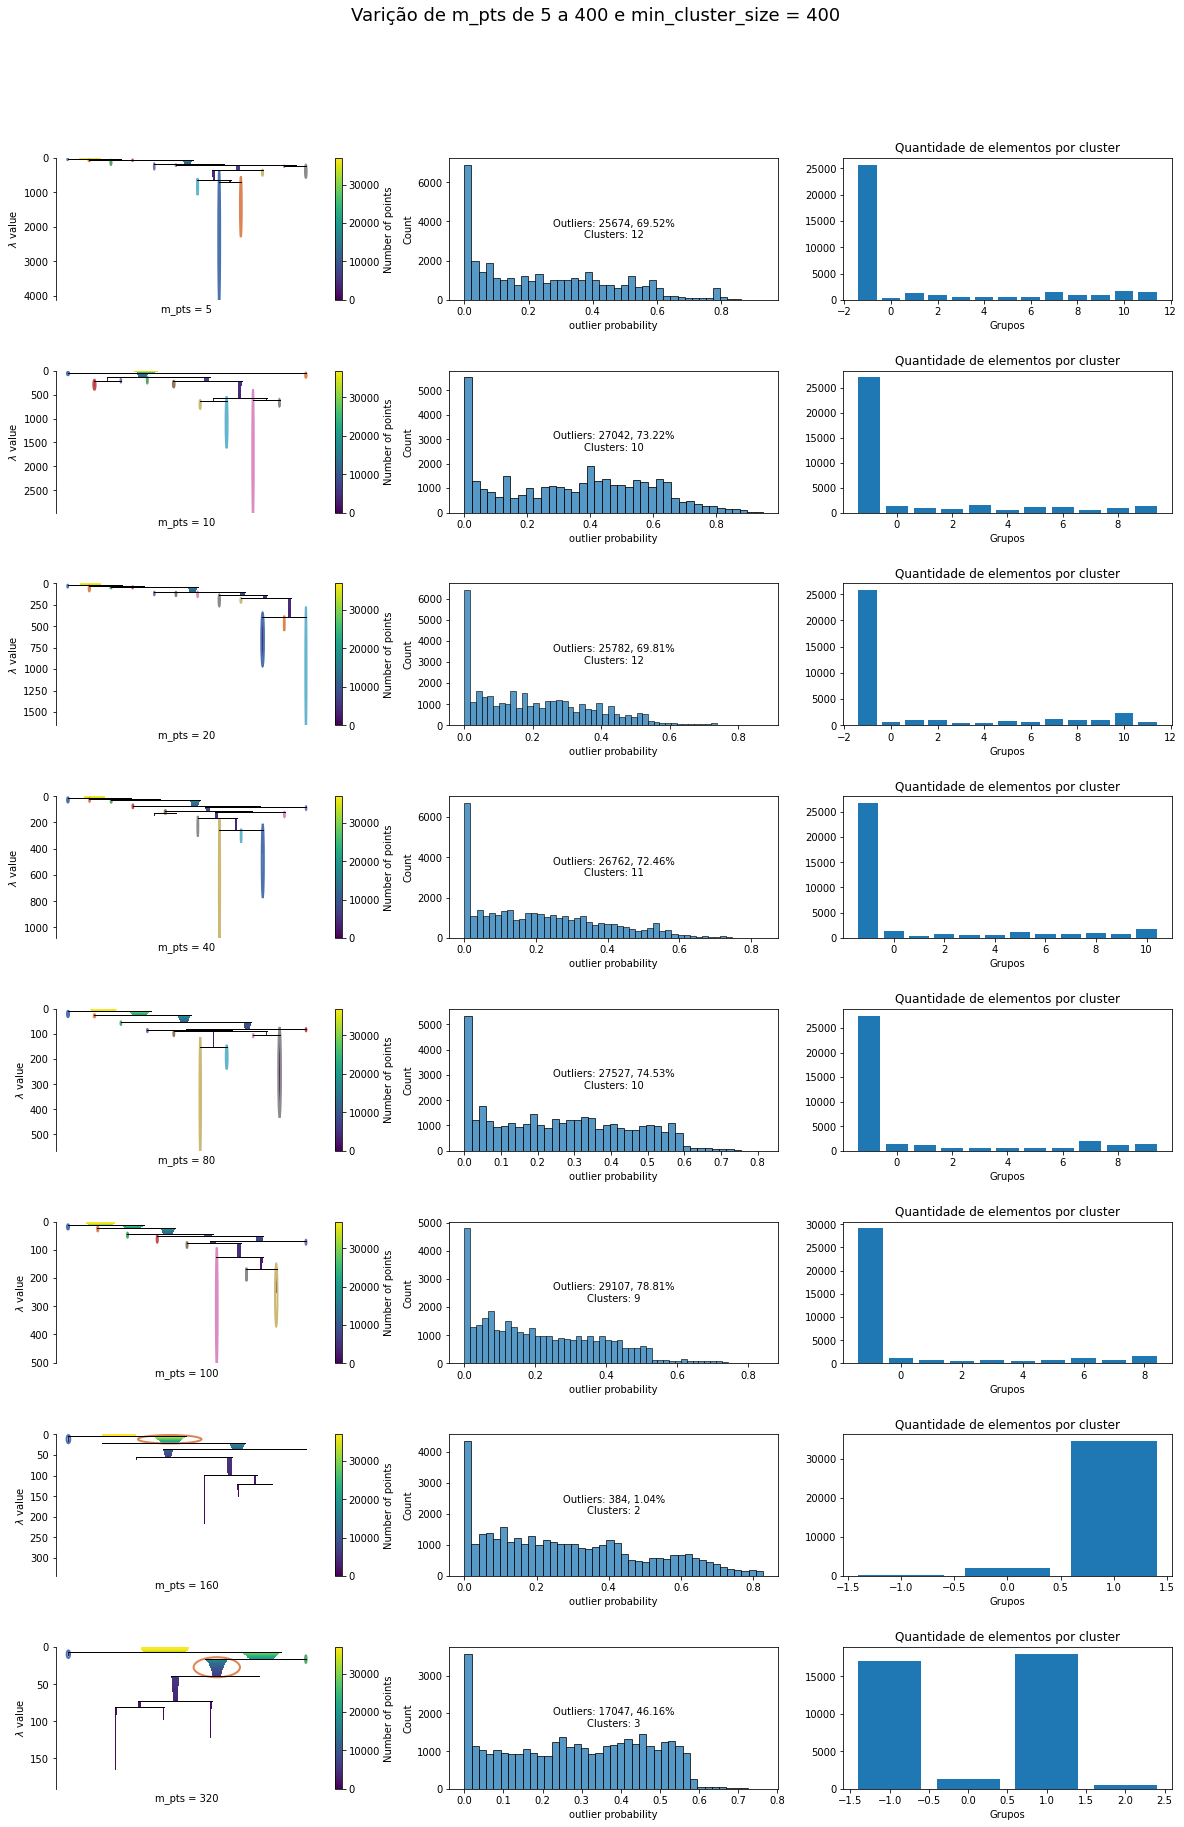

In [19]:
min_samples = 5
min_cluster_size = 400
n_linhas = math.floor(np.log2(min_cluster_size))
cont = 1
plt.figure(figsize=(20,30))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Varição de m_pts de 5 a {} e min_cluster_size = {}".format(min_cluster_size,min_cluster_size), fontsize=18, y=0.95)

while (min_samples <= min_cluster_size):
    # HDBSCAN
    cluster = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples, gen_min_span_tree=True)
    cluster.fit(dim6)

    # Dendogama condensado
    ax = plt.subplot(n_linhas,3,cont)
    cluster.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette('deep',30))
    ax.set_xlabel("m_pts = {}".format(min_samples))
    
    # Detalhes sobre  os dados
    outliers = 0
    aux = []
    dicionario = {}
    labels = cluster.labels_
    num_dados = labels.shape[0]
    for label in labels:
        if label not in aux:
            aux.append(label)
            dicionario[label] = 1
        else:
            for num in aux:
                if num == label:
                    dicionario[label] += 1
        if label == -1:
            outliers = outliers + 1
    sum = 0

    # Histograma de probabilidade de ser outlier
    ax = plt.subplot(n_linhas,3,cont+1)
    outlier_scores = cluster.outlier_scores_
    sns.histplot(cluster.outlier_scores_[np.isfinite(cluster.outlier_scores_)])
    ax.set_xlabel("outlier probability")
    for x, y in dicionario.items():
        if x == -1:
            #print("São {} pontos outliers de {} de pontos no total.\n Há {} de outliers".format(y, x, 100*y/num_dados))
            ax.text(0.5, 0.5, 'Outliers: {}, {:.2f}%\nClusters: {}'.format(y,100*y/num_dados,len(aux)-1), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
            sum += y
        else:
            #print("São {} pontos no grupo {}".format(y, x))
            sum += y
    
    # Histograma contendo a quantidade de elementos por cluster
    keys = list(dicionario.keys())
    keys.sort()
    dicionario_ordenado = {key: dicionario[key] for key in keys}
    keys, itens = zip(*dicionario_ordenado.items())
    ax = plt.subplot(n_linhas,3, cont+2)
    plt.bar(keys, itens)
    ax.set_title("Quantidade de elementos por cluster")
    ax.set_xlabel("Grupos")
    
    if(min_samples==80):
        min_samples = 100
    elif(min_samples==100):
        min_samples=160
    else:
        min_samples = min_samples*2
        
    cont+=3
    

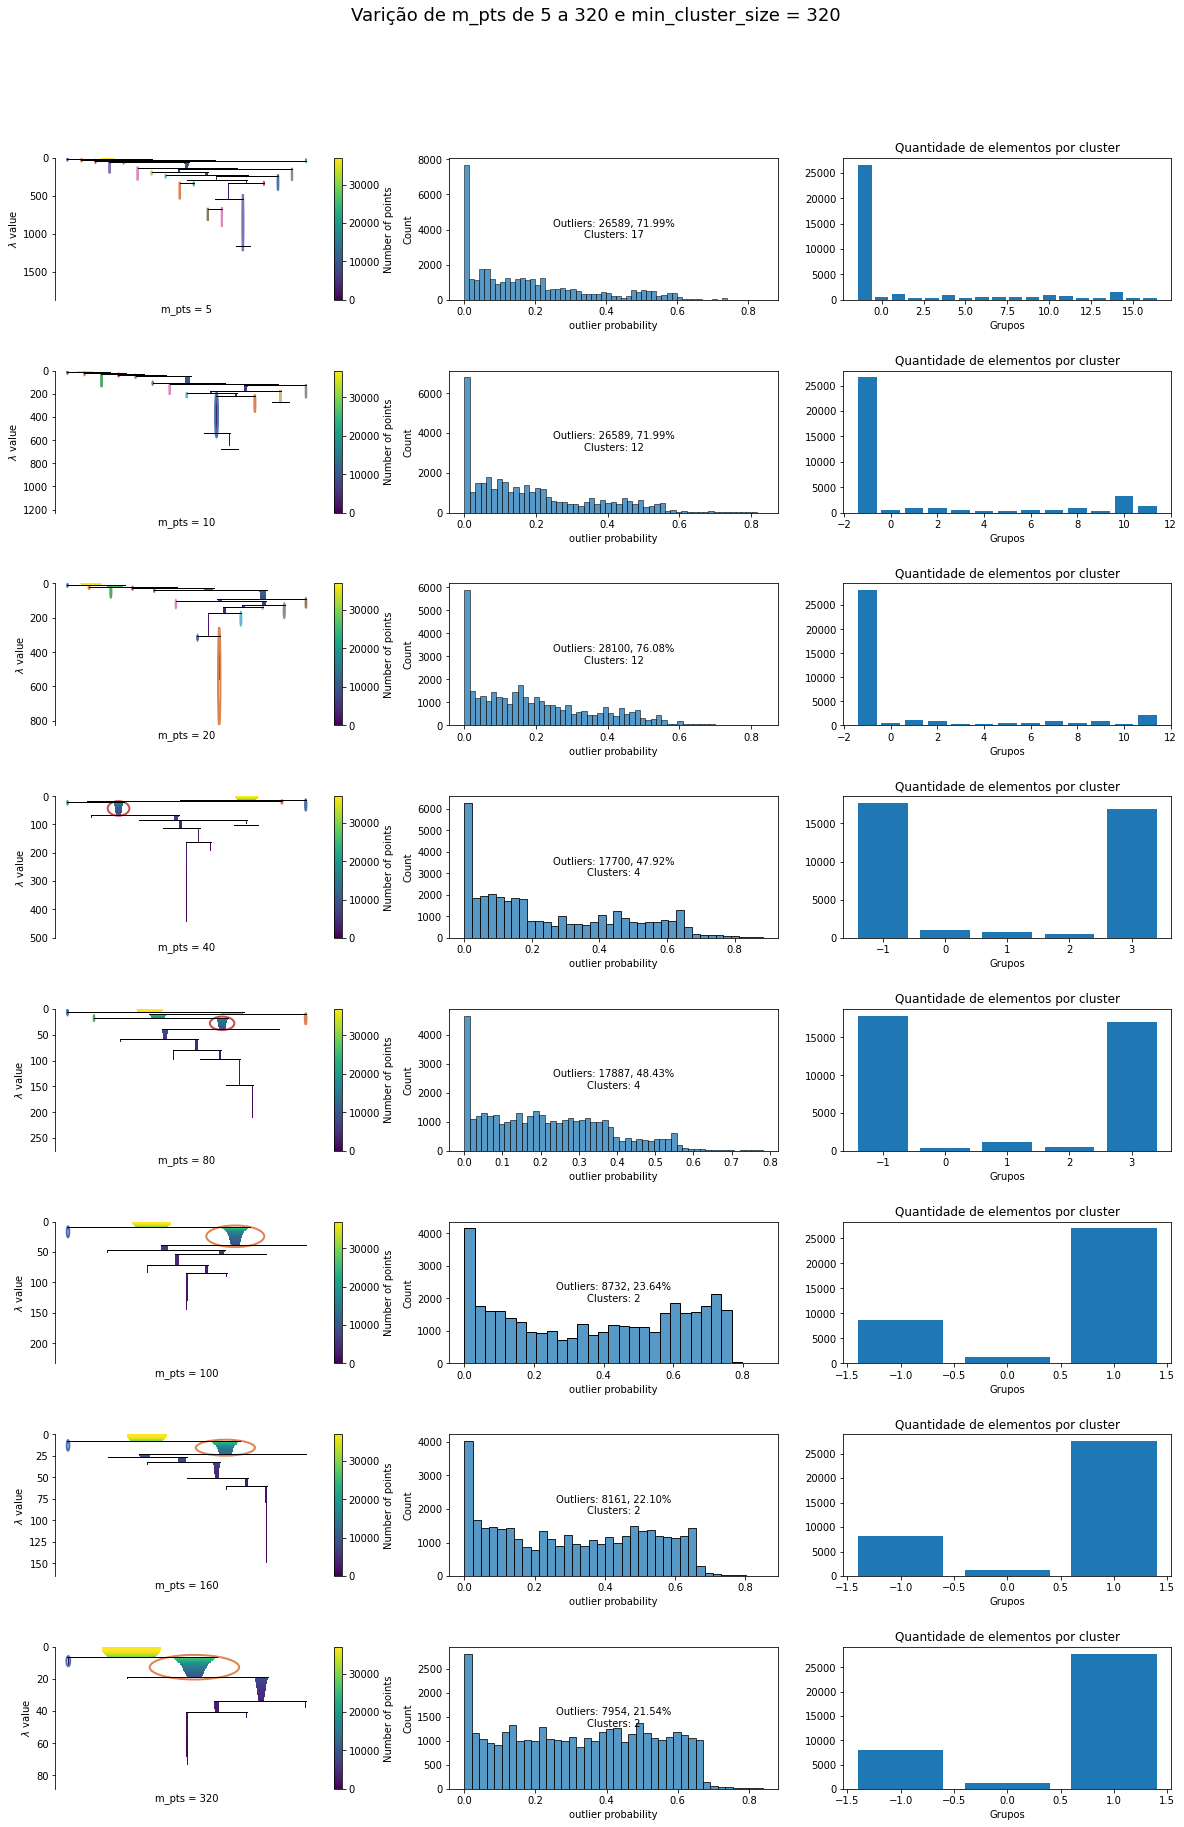

In [20]:
min_samples = 5
min_cluster_size = 320
n_linhas = math.floor(np.log2(min_cluster_size))
cont = 1
plt.figure(figsize=(20,30))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Varição de m_pts de 5 a {} e min_cluster_size = {}".format(min_cluster_size,min_cluster_size), fontsize=18, y=0.95)

while (min_samples <= min_cluster_size):
    # HDBSCAN
    cluster = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples, gen_min_span_tree=True)
    cluster.fit(dados_dim12)

    # Dendogama condensado
    ax = plt.subplot(n_linhas,3,cont)
    cluster.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette('deep',30))
    ax.set_xlabel("m_pts = {}".format(min_samples))
    
    # Detalhes sobre  os dados
    outliers = 0
    aux = []
    dicionario = {}
    labels = cluster.labels_
    num_dados = labels.shape[0]
    
    for label in labels:
        if label not in aux:
            aux.append(label)
            dicionario[label] = 1
        else:
            for num in aux:
                if num == label:
                    dicionario[label] += 1
        if label == -1:
            outliers = outliers + 1
    sum = 0

    # Histograma de probabilidade de ser outlier
    ax = plt.subplot(n_linhas,3,cont+1)
    outlier_scores = cluster.outlier_scores_
    sns.histplot(cluster.outlier_scores_[np.isfinite(cluster.outlier_scores_)])
    ax.set_xlabel("outlier probability")
    for x, y in dicionario.items():
        if x == -1:
            #print("São {} pontos outliers de {} de pontos no total.\n Há {} de outliers".format(y, x, 100*y/num_dados))
            ax.text(0.5, 0.5, 'Outliers: {}, {:.2f}%\nClusters: {}'.format(y,100*y/num_dados,len(aux)-1), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
            sum += y
        else:
            #print("São {} pontos no grupo {}".format(y, x))
            sum += y
    
    # Histograma contendo a quantidade de elementos por cluster
    keys = list(dicionario.keys())
    keys.sort()
    dicionario_ordenado = {key: dicionario[key] for key in keys}
    keys, itens = zip(*dicionario_ordenado.items())
    ax = plt.subplot(n_linhas,3, cont+2)
    plt.bar(keys, itens)
    ax.set_title("Quantidade de elementos por cluster")
    ax.set_xlabel("Grupos")
    
    if(min_samples==80):
        min_samples = 100
    elif(min_samples==100):
        min_samples=160
    else:
        min_samples = min_samples*2
        
    cont+=3

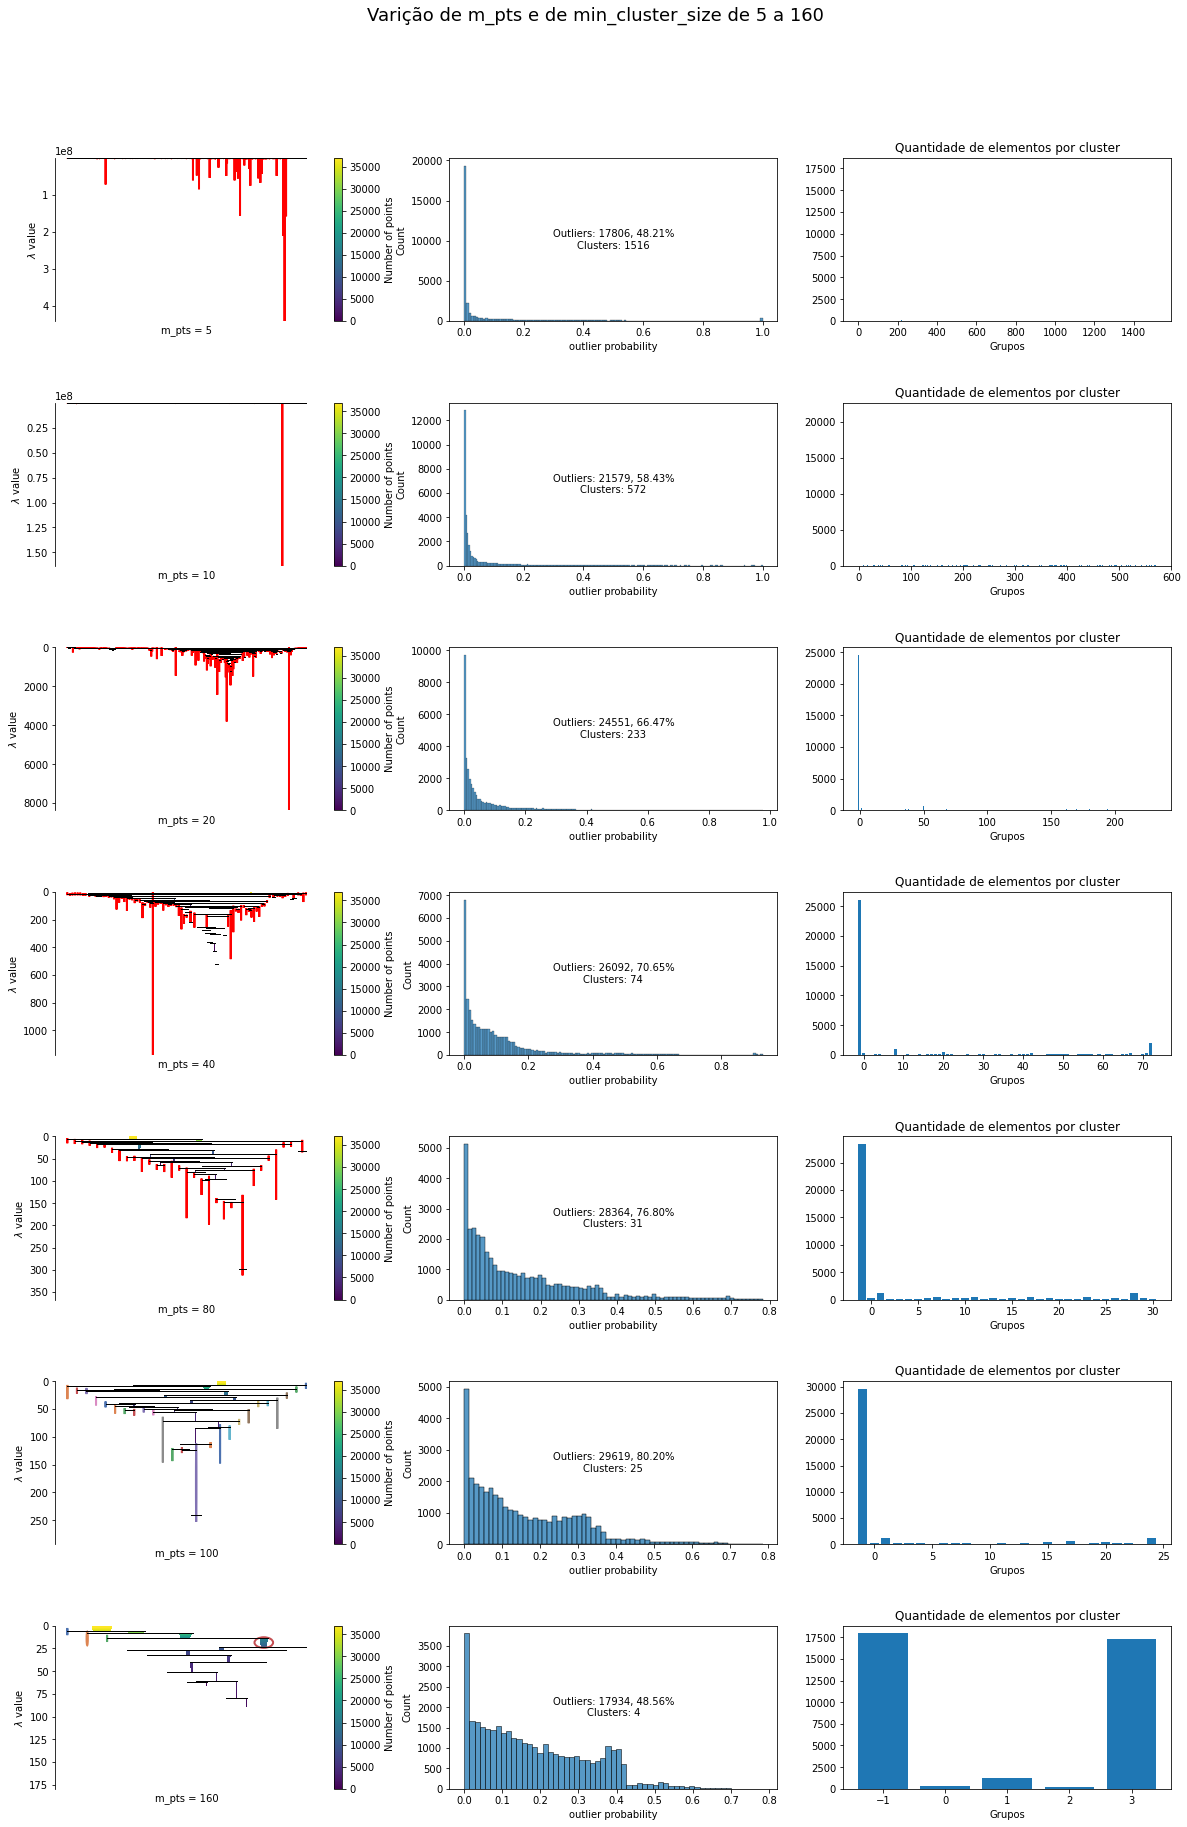

In [12]:
min_samples = 5
min_cluster_size = 160
n_linhas = math.floor(np.log2(min_cluster_size))
cont = 1
plt.figure(figsize=(20,30))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Varição de m_pts e de min_cluster_size de 5 a {}".format(min_cluster_size), fontsize=18, y=0.95)

while (min_samples <= 160):
    # HDBSCAN
    cluster = hdbscan.HDBSCAN(min_cluster_size=min_samples, gen_min_span_tree=True)
    cluster.fit(dados_dim12)

    # Dendogama condensado
    ax = plt.subplot(n_linhas,3,cont)
    cluster.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette('deep',30))
    ax.set_xlabel("m_pts = {}".format(min_samples))
    
    # Detalhes sobre  os dados
    outliers = 0
    aux = []
    dicionario = {}
    labels = cluster.labels_
    num_dados = labels.shape[0]
    
    for label in labels:
        if label not in aux:
            aux.append(label)
            dicionario[label] = 1
        else:
            for num in aux:
                if num == label:
                    dicionario[label] += 1
        if label == -1:
            outliers = outliers + 1
    sum = 0

    # Histograma de probabilidade de ser outlier
    ax = plt.subplot(n_linhas,3,cont+1)
    outlier_scores = cluster.outlier_scores_
    sns.histplot(cluster.outlier_scores_[np.isfinite(cluster.outlier_scores_)])
    ax.set_xlabel("outlier probability")
    for x, y in dicionario.items():
        if x == -1:
            #print("São {} pontos outliers de {} de pontos no total.\n Há {} de outliers".format(y, x, 100*y/num_dados))
            ax.text(0.5, 0.5, 'Outliers: {}, {:.2f}%\nClusters: {}'.format(y,100*y/num_dados,len(aux)-1), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
            sum += y
        else:
            #print("São {} pontos no grupo {}".format(y, x))
            sum += y
    
    # Histograma contendo a quantidade de elementos por cluster
    keys = list(dicionario.keys())
    keys.sort()
    dicionario_ordenado = {key: dicionario[key] for key in keys}
    keys, itens = zip(*dicionario_ordenado.items())
    ax = plt.subplot(n_linhas,3, cont+2)
    plt.bar(keys, itens)
    ax.set_title("Quantidade de elementos por cluster")
    ax.set_xlabel("Grupos")
    
    if(min_samples==80):
        min_samples = 100
    elif(min_samples==100):
        min_samples=120
    elif(min_samples==120):
        min_samples=160
    else:
        min_samples = min_samples*2
        
    cont+=3